# CNN 2D IoT Classification Model

In [1]:
from __future__ import print_function
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import plot_model
from keras.models import Model
from keras.optimizers import adadelta as ada
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import copy
import pydot
from keras.utils import multi_gpu_model


from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

%matplotlib inline

Using TensorFlow backend.
c:\users\mrathbun2018\.conda\envs\mattwork\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\mrathbun2018\.conda\envs\mattwork\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\mrathbun2018\.conda\envs\mattwork\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\mrathbun2018\.con

## Open and Read Data

In [4]:
def data():
    hdf5_path = 'Data/dataset.hdf5'
    subtract_mean = True
    hdf5_file = h5py.File(hdf5_path, "r")
    if subtract_mean:
        mm = hdf5_file["train_mean"][0, ...]
        mm = mm[np.newaxis, ...]
    data_num = hdf5_file["train_flow"].shape[0]
    

    
    num_classes = 2
    epochs = 30

    flow_rows, flow_cols = 298, 17

    

    x_train = hdf5_file["train_flow"][:,...]
    if subtract_mean:
        x_train -= mm

    y_train = hdf5_file["train_labels"][:, ...]

    hdf5_file.close()
    
    hdf5_path = 'Data/dataset-IoT.hdf5'
    hdf5_file = h5py.File(hdf5_path, "r")

    x_test = hdf5_file["IoT_flow"][:,...]
    if subtract_mean:
        x_test -= mm

    y_test = hdf5_file["labels"][:, ...]

    hdf5_file.close()





    class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
    d_class_weights = dict(enumerate(class_weights))

    input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])


    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

## Build Model

In [5]:
def create_model(x_train, y_train, x_test, y_test):
    batch_size = {{choice([256,512,1024])}}
    epochs = 30
    filters={{choice([32,64,128])}}
    kernel_size={{choice([(2,2),(3,3)])}}
    activations={{choice(['relu', 'sigmoid', 'tanh'])}}
    pool_size={{choice([(2,2),(3,3)])}}
    dropout = {{uniform(0.1, 0.3)}}
    lr = {{uniform(0.0009, 0.00225)}}
    adam = keras.optimizers.Adam(lr=lr)
    rmsprop = keras.optimizers.RMSprop(lr=lr)
    sgd = keras.optimizers.SGD(lr=lr)

    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = adam
    elif choiceval == 'rmsprop':
        optim = rmsprop
    else:
        optim = sgd
    
    layers = {{choice([1,2,3,4])}}
    model = Sequential()

    model.add(Conv2D(filters, kernel_size=kernel_size,activation=activations, input_shape=input_shape,padding = "same"))
    for i in range(layers-1):
        model.add(Conv2D(filters,kernel_size=kernel_size, activation=activations, padding = "valid"))
        
    model.add(MaxPooling2D(pool_size=(pool_size)))
    model.add(Flatten())
    model.add(Dropout(dropout))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    try:
        model = multi_gpu_model(model, gpus = 4)
    except:
        pass
    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2, class_weight=class_weights, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    loss = score[0]
    return {'loss': loss, 'status': STATUS_OK, 'model': model} 

## Run Model

In [6]:
x_train, y_train, x_test, y_test = data()
best_run, best_model = optim.minimize(model=create_model, data=data, algo=tpe.suggest, max_evals=100, trials=Trials(), eval_space=True, notebook_name='2D-CNN')

print("Evalutation of best performing model:")
print(best_model.evaluate(x_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import h5py
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.utils import class_weight
except:
    pass

try:
    from sklearn.metrics import classification_report
except:
    pass

try:
    import keras
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Dropout, Flatten, Input, Concatenate, Reshape
except:
    pass

try:
    from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
except:
    pass

try:
    from keras.utils import plot_model
except:
    pass

try:
    from keras.models import Model
except:
    pass

try:
    from keras.optimizers import adadelta as ada
except:
    pass

try:
    from PIL import Image
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import pandas as pd
except:
    pass



## Model Analysis
#### Classification Report
#### Confusion Matrix
#### Area Under Reciever Operating Characteristic Curve

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     34974
           1       0.91      0.28      0.43      7193

    accuracy                           0.87     42167
   macro avg       0.89      0.64      0.68     42167
weighted avg       0.88      0.87      0.84     42167

[[34777   197]
 [ 5185  2008]]
0.9102583153845071


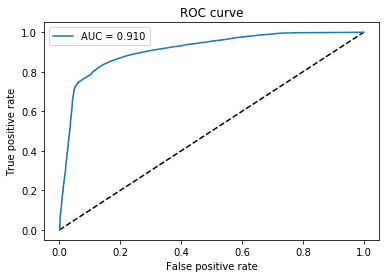

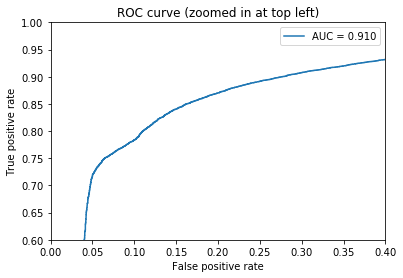

0.9755404721043346
0.7102951553437908


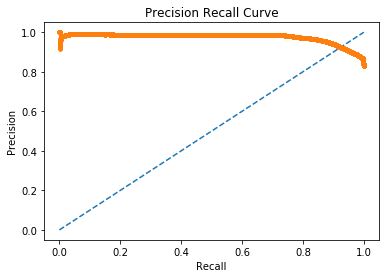

0.914544340316118
0.7102951553437908


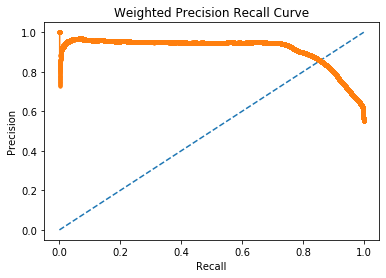

In [16]:
y_pred = best_model.predict(x_test)
yy_test = [np.argmax(i) for i in y_test]

yy_pred = [np.argmax(i) for i in y_pred]

print(classification_report(yy_test, yy_pred))     
  
new = np.vstack([yy_test,yy_pred])

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print(confusion_matrix(yy_test, yy_pred))



y_pred_keras = best_model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yy_test, y_pred[:,0],pos_label=0)
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

f1 = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
f1.savefig("ROC-curve-cnn2D.pdf", bbox_inches='tight')

f2 = plt.figure()
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
f2.savefig("ROC-curve-zoomed-cnn2D.pdf", bbox_inches='tight')

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(yy_test,  y_pred[:,0],pos_label=0)
# calculate F1 score
#f1 = f1_score(yy_test, y_pred)
# calculate precision-recall AUC
auc_score = auc(recall, precision)
print(auc_score)
# calculate average precision score
ap = average_precision_score(yy_test, y_pred[:,1])
print(ap)
#print('auc=%.3f ap=%.3f' % (auc, ap))
# plot no skill
f3 = plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
plt.plot( recall, precision,marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

# show the plot
plt.show()
f3.savefig("precisionrecall-cnn2D.pdf", bbox_inches='tight')
num_positive = float(np.count_nonzero(yy_test))
num_negative = float(len(yy_test) - num_positive)
pos_weight = num_negative / num_positive
weights = np.ones_like(yy_test)
weights[yy_test != np.float64(0)] = pos_weight


precision_weighted, recall_weighted, thresholds_weighted = precision_recall_curve(yy_test,  y_pred[:,0],pos_label=0,sample_weight=weights)
#calculate F1 score
#f1 = f1_score(yy_test, y_pred)
# calculate precision-recall AUC
auc_score = auc(recall_weighted, precision_weighted)
print(auc_score)
# calculate average precision score
ap = average_precision_score(yy_test, y_pred[:,1])
print(ap)
#print('auc=%.3f ap=%.3f' % (auc, ap))
# plot no skill
f4 = plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the weighted precision-recall curve for the model
plt.plot( recall_weighted, precision_weighted,marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Weighted Precision Recall Curve')
# show the plot
plt.show()
f4.savefig("weightedprecisionrecall-cnn2D.pdf", bbox_inches='tight')

In [8]:
best_model.save('cnn2D.h5')

## Save Model Analysis Data

In [9]:
d = {'False Positive Rate': fpr_keras, 'True Positive Rate': tpr_keras , 'Thresholds': thresholds_keras}

In [10]:
roc_CNN2D = pd.DataFrame(data=d)

In [11]:
roc_CNN2D.to_csv(path_or_buf ='rocCNN2D.csv', index=False)

In [12]:
conf = confusion_matrix(yy_test, yy_pred)

In [13]:
conf2D=pd.DataFrame(data=conf)

In [14]:
conf2D.to_csv(path_or_buf='ConfusionCNN2D.csv',index=False)

In [17]:
pd.DataFrame({"precision" : precision, "recall" :recall}).to_csv("precisionrecall-CNN2D.csv", index=None)
pd.DataFrame({"precision" : precision_weighted, "recall" :recall_weighted}).to_csv("weightedprecisionrecall-CNN2D.csv", index=None)
